# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving ADANIPORTS_test.csv to ADANIPORTS_test (1).csv
Saving ADANIPORTS_train.csv to ADANIPORTS_train (1).csv


### Importing the training set

In [ ]:
dataset_train = pd.read_csv('ADANIPORTS_train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[962.9 ]
 [893.9 ]
 [884.2 ]
 ...
 [315.4 ]
 [319.  ]
 [314.15]]


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with n timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 2700):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 1000, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.3))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 1000, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third, foruth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 1000, return_sequences = True))
regressor.add(Dropout(0.2))


In [ ]:
regressor.add(LSTM(units = 1000, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fifth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 1000))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 25, batch_size = 64)

Epoch 1/25
42/42 [==============================] - 25s 266ms/step - loss: 0.0234
Epoch 2/25
42/42 [==============================] - 12s 277ms/step - loss: 0.0017
Epoch 3/25
42/42 [==============================] - 12s 281ms/step - loss: 0.0015
Epoch 4/25
42/42 [==============================] - 12s 287ms/step - loss: 0.0011
Epoch 5/25
42/42 [==============================] - 12s 298ms/step - loss: 0.0014
Epoch 6/25
42/42 [==============================] - 13s 308ms/step - loss: 0.0011
Epoch 7/25
42/42 [==============================] - 13s 303ms/step - loss: 0.0011
Epoch 8/25
42/42 [==============================] - 12s 295ms/step - loss: 0.0010
Epoch 9/25
42/42 [==============================] - 12s 290ms/step - loss: 7.9214e-04
Epoch 10/25
42/42 [==============================] - 12s 289ms/step - loss: 0.0012
Epoch 11/25
42/42 [==============================] - 12s 290ms/step - loss: 9.3352e-04
Epoch 12/25
42/42 [==============================] - 12s 295ms/step - loss: 7.8826e-04
E

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('ADANIPORTS_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 672):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

20/20 [==============================] - 1s 61ms/step


### Visualising the results

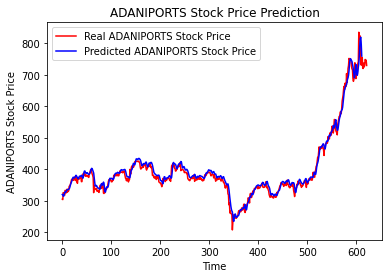

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real ADANIPORTS Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted ADANIPORTS Stock Price')
plt.title('ADANIPORTS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ADANIPORTS Stock Price')
plt.legend()
plt.show()